I will test out the 2D random connectivity Hopfield network implementation, and investigate its memory capacity.

## Imports...

In [1]:
# enables plotting inline of Jupyter notebooks
%matplotlib inline

# autoreloading of modules
%load_ext autoreload
%autoreload 2

import numpy as np
import math

from network import HopfieldNetwork
from pattern_tools import PatternFactory
import pattern_tools
import plot_tools

import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = (10.0, 8.0) # set default size of plots

## Randomly Connected Hopfield Network(s)

### Architecture Parameters

Set these to determine:

- The number of neurons in the network (and thus, the height / width of the corresponding 2D pattern).
- The probability that a given state in a randomly generated pattern is "on".
- The number of patterns to store in the network.
- The number of state flips to perform for noisy pattern recall (network initialization).
- The number of steps to allow the network dynamics to evolve.
- The percentage of connections (on top of lattice connections) which should be kept in the network.

In [17]:
# should be a square number for 2D patterns
nr_neurons = 100
pattern_length, pattern_width = int(math.sqrt(nr_neurons)), int(math.sqrt(nr_neurons))

# for random patterns, the probability that a single pixel is "on"
on_probability = 0.50
# number of patterns to store in the network (for fully connected, capacity is ~14%)
nr_patterns = 15

# number of flips to do noisy pattern network initialization
nr_of_flips = int(math.ceil(.10 * nr_neurons))
# number of steps to unroll the network dynamics
nr_steps = 7

# percentage of non-lattice, non-self-connections to add to the network
percent_connect = 0.5

### Creating Hopfield network with random connectivity; generating and storing random patterns

We create our Hopfield network with (approximately) the chosen percentage of random connections, create the chosen number of random patterns, and have the network store the generated patterns. We visualize the weight matrix which results after storing the patterns.

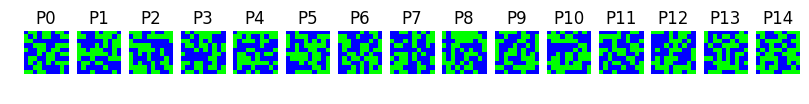

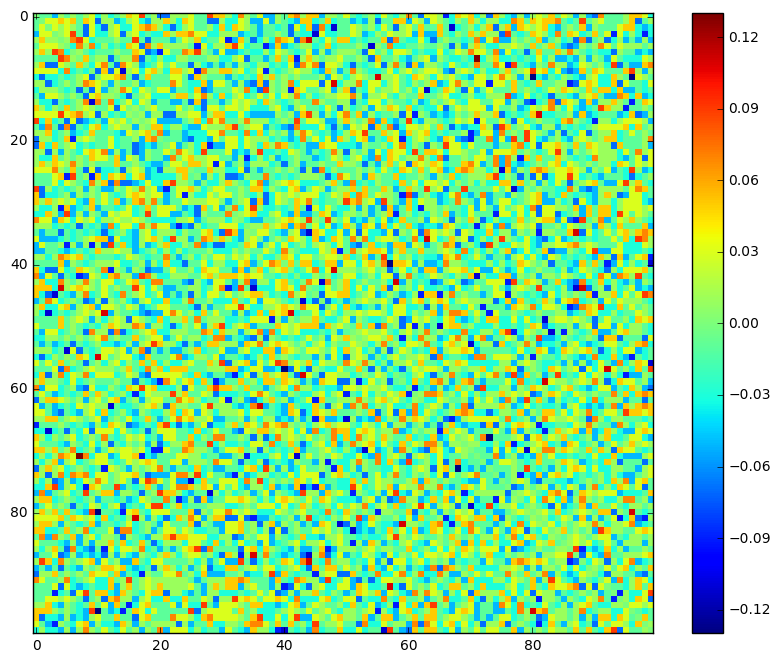

In [19]:
# create Hopfield network with lattice connectivity
nn = HopfieldNetwork(nr_neurons=nr_neurons, connectivity='random', percent_connect=percent_connect)

# create a pattern factory for this network
factory = PatternFactory(pattern_length=pattern_length, pattern_width=pattern_width)
# create 5 random patterns to store in the network (it shouldn't be able to recall whatsoever).
patterns = factory.create_random_pattern_list(nr_patterns=nr_patterns, on_probability=on_probability)
# plot the patterns
plot_tools.plot_pattern_list(patterns)

# store the patterns in the lattice Hopfield network
nn.store_patterns(patterns)
# take a look at network weights
plot_tools.plot_network_weights(hopfield_network=nn)

### Recalling Stored Patterns

Now, for each stored pattern, we flip the chosen number of states and let the network evolve for the chosen number of iterations and plot the network dynamics that result.

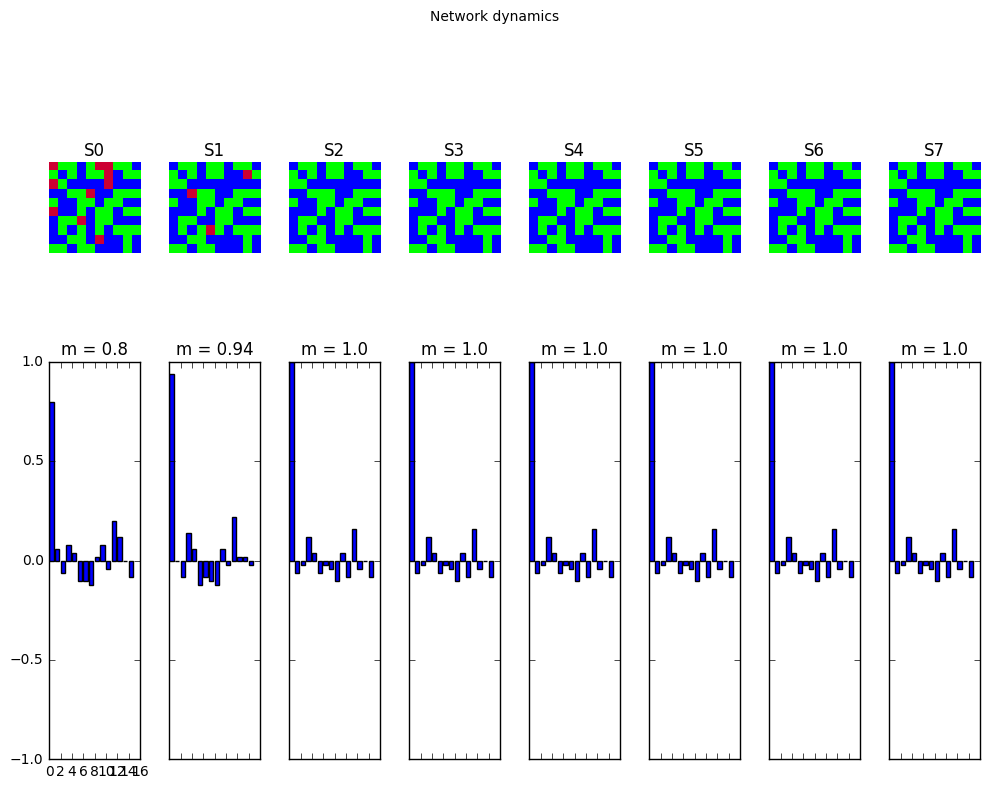

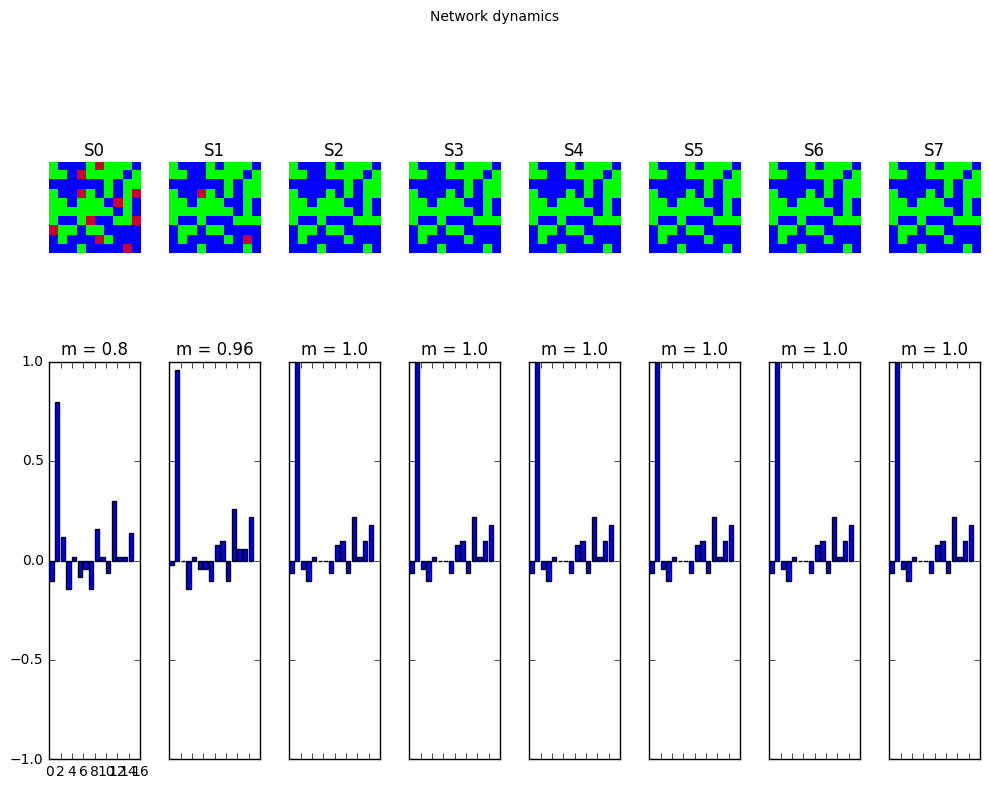

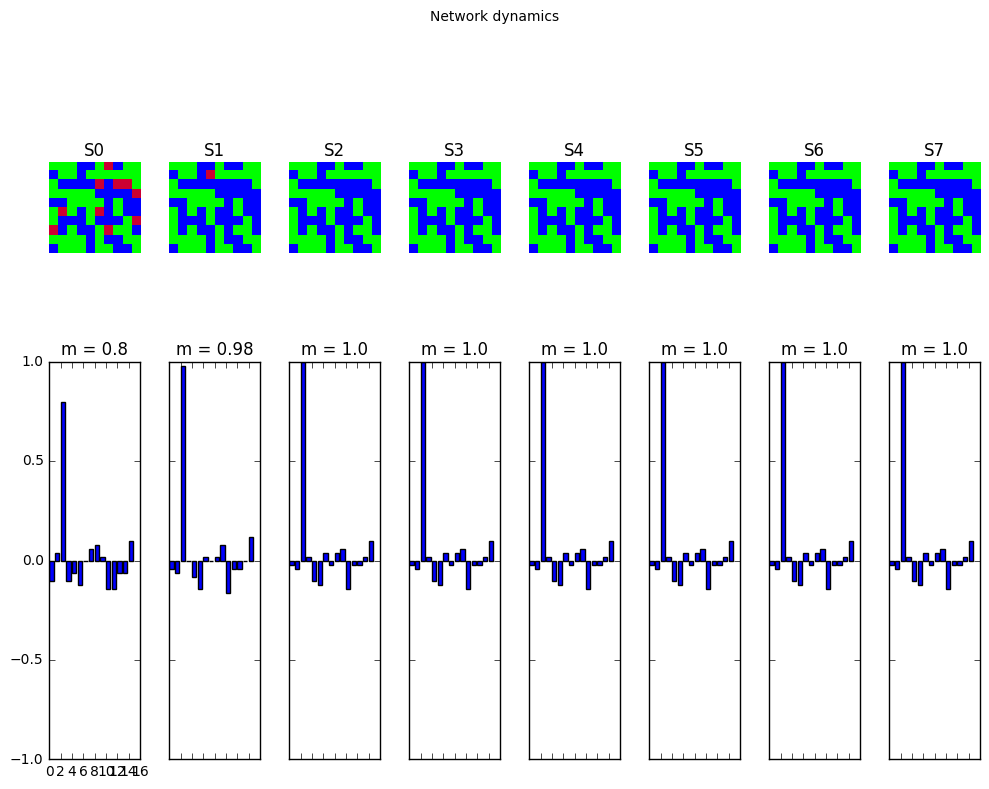

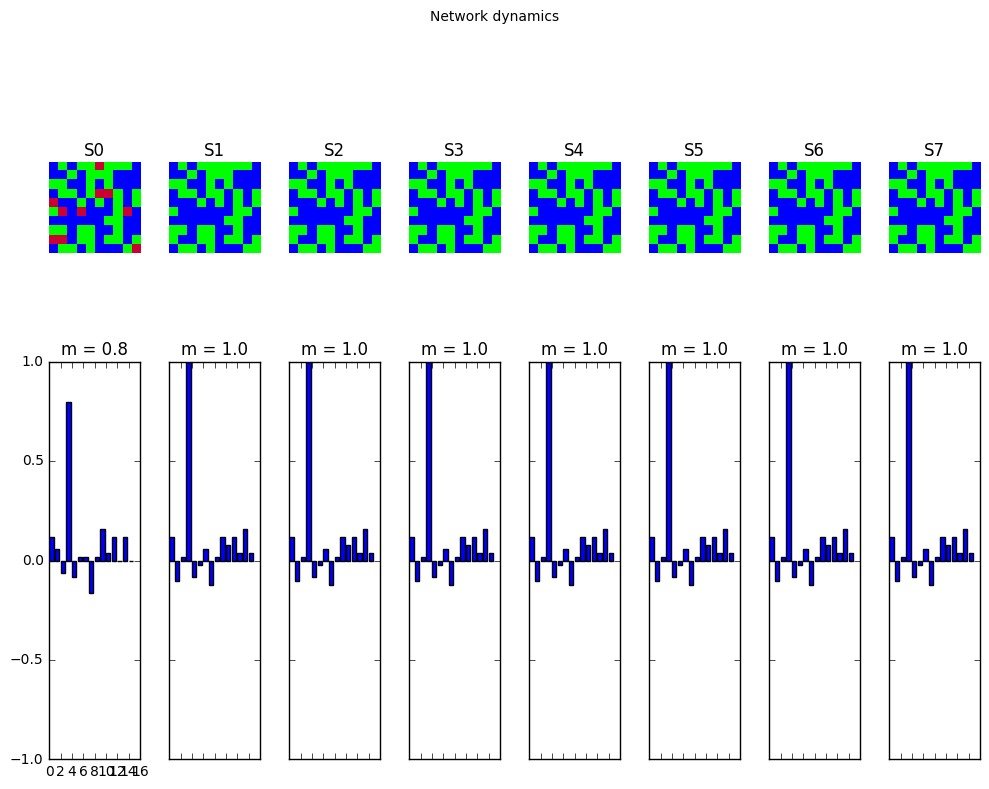

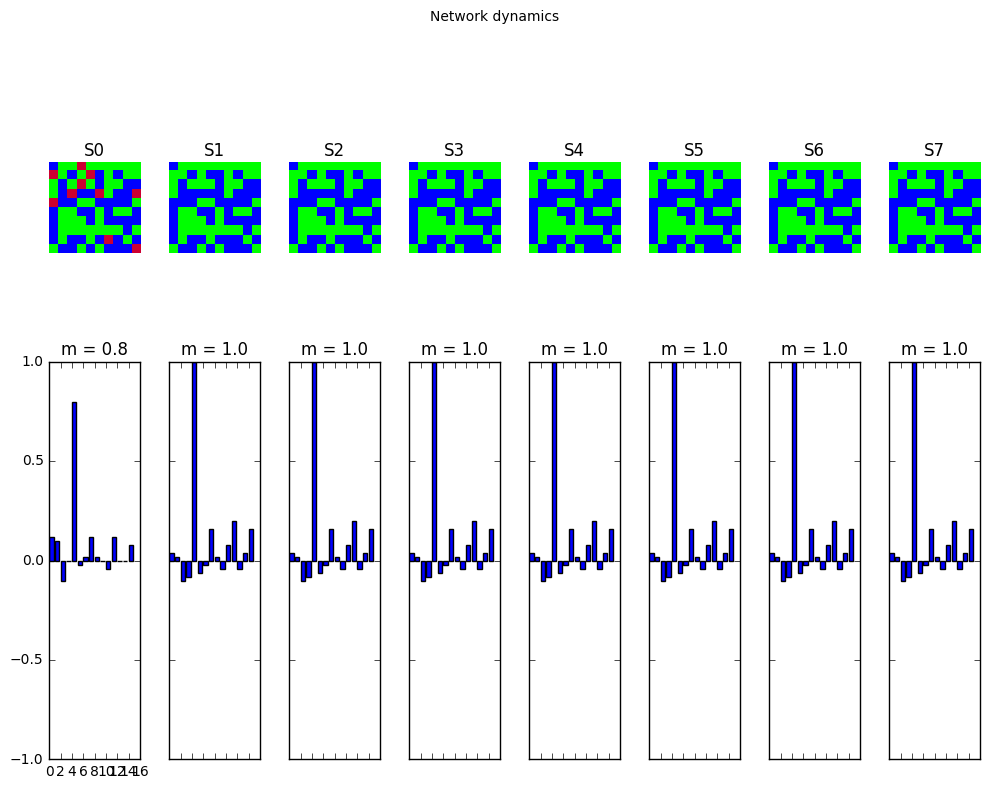

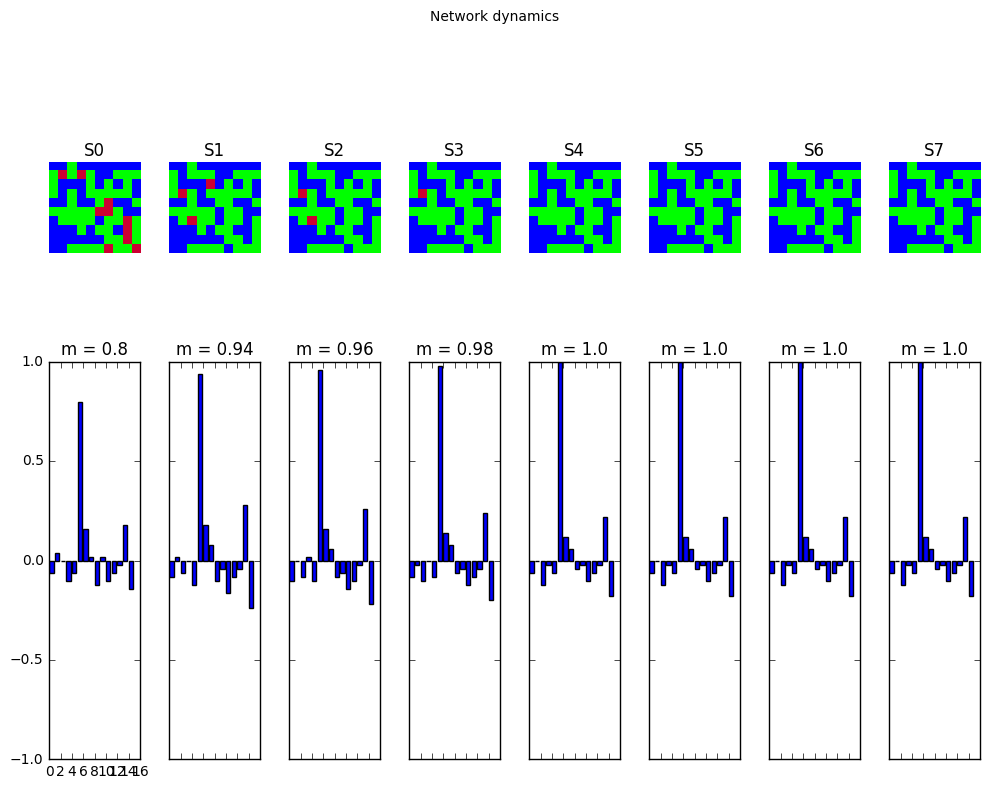

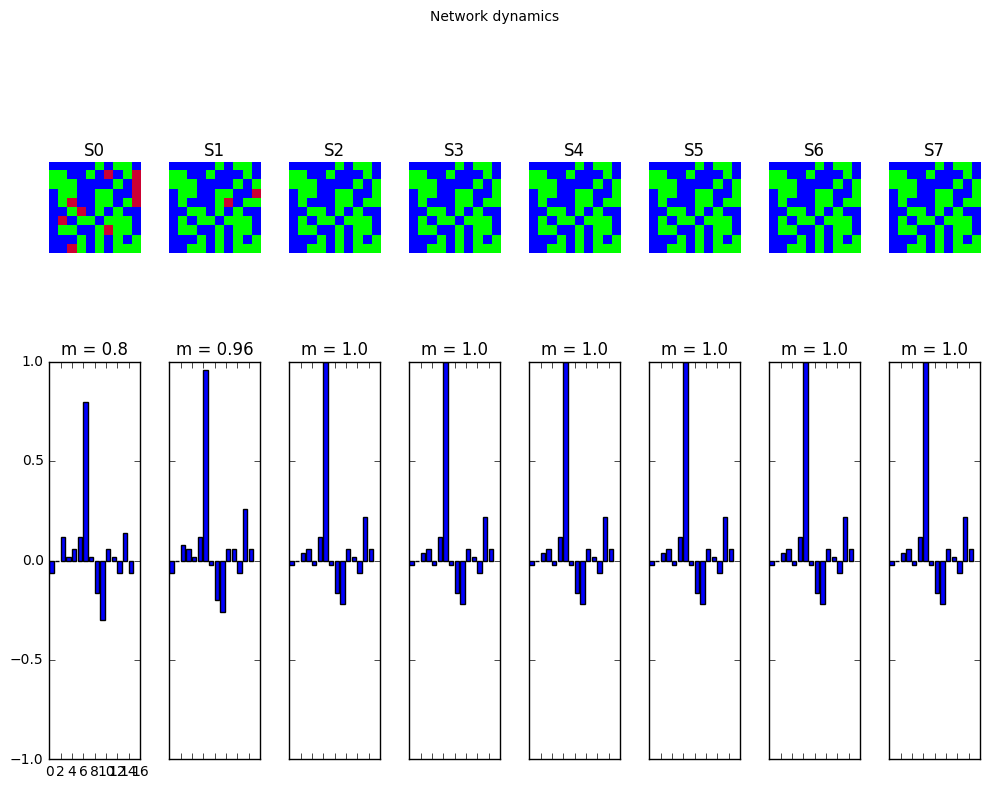

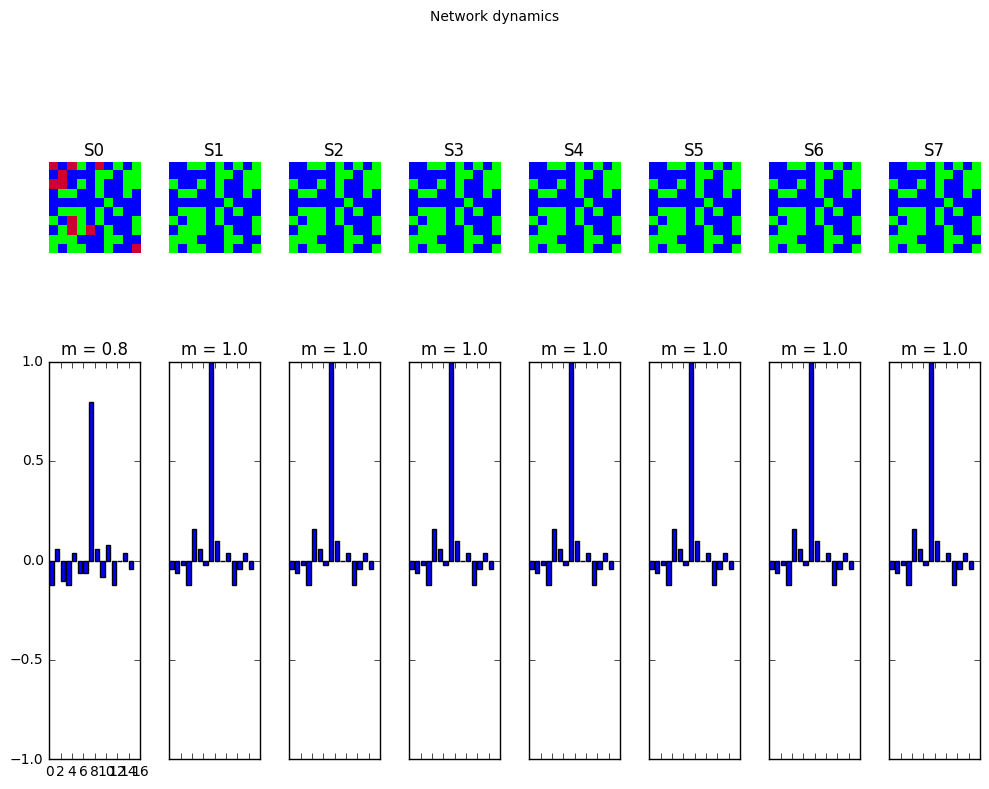

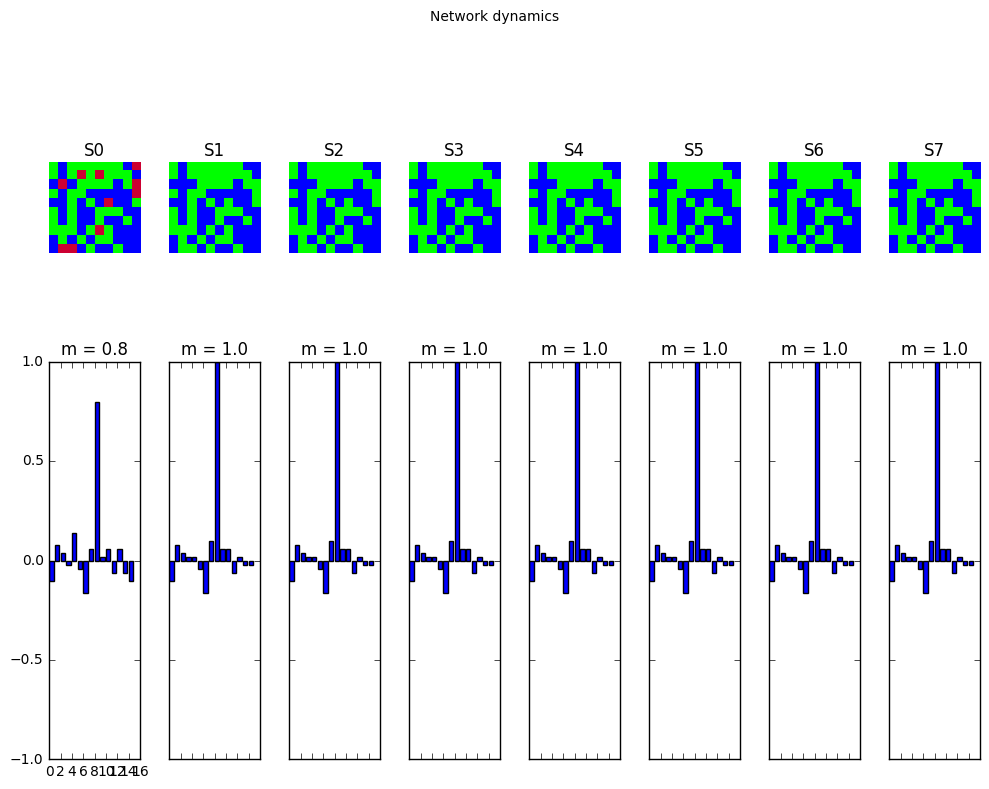

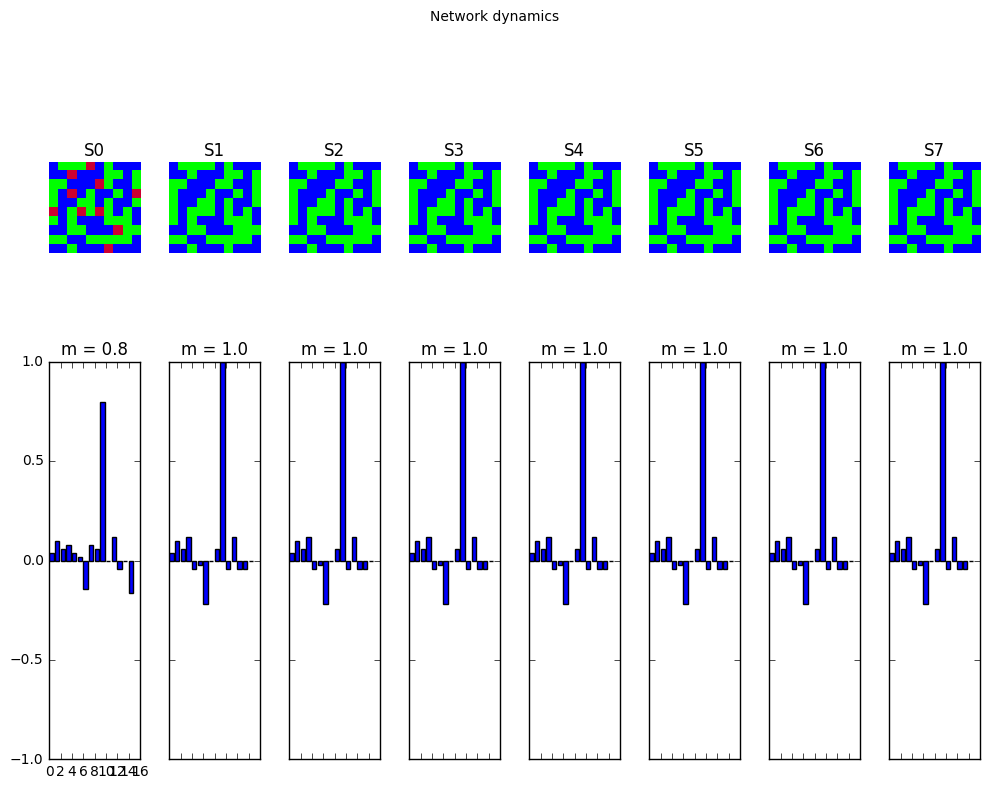

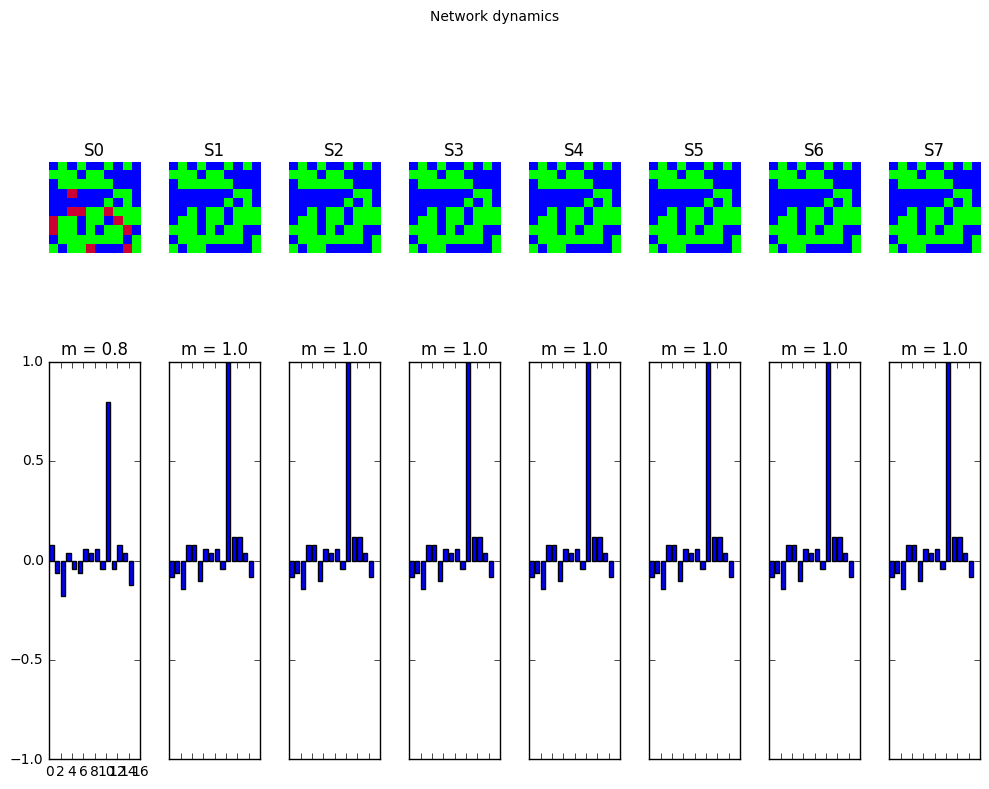

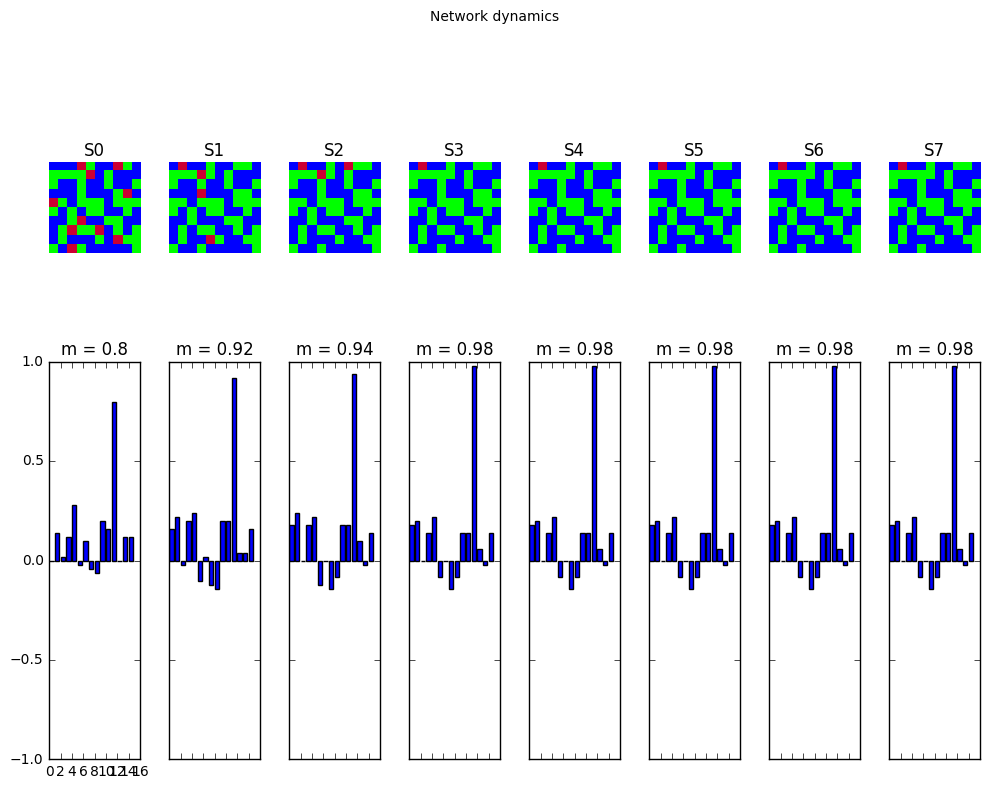

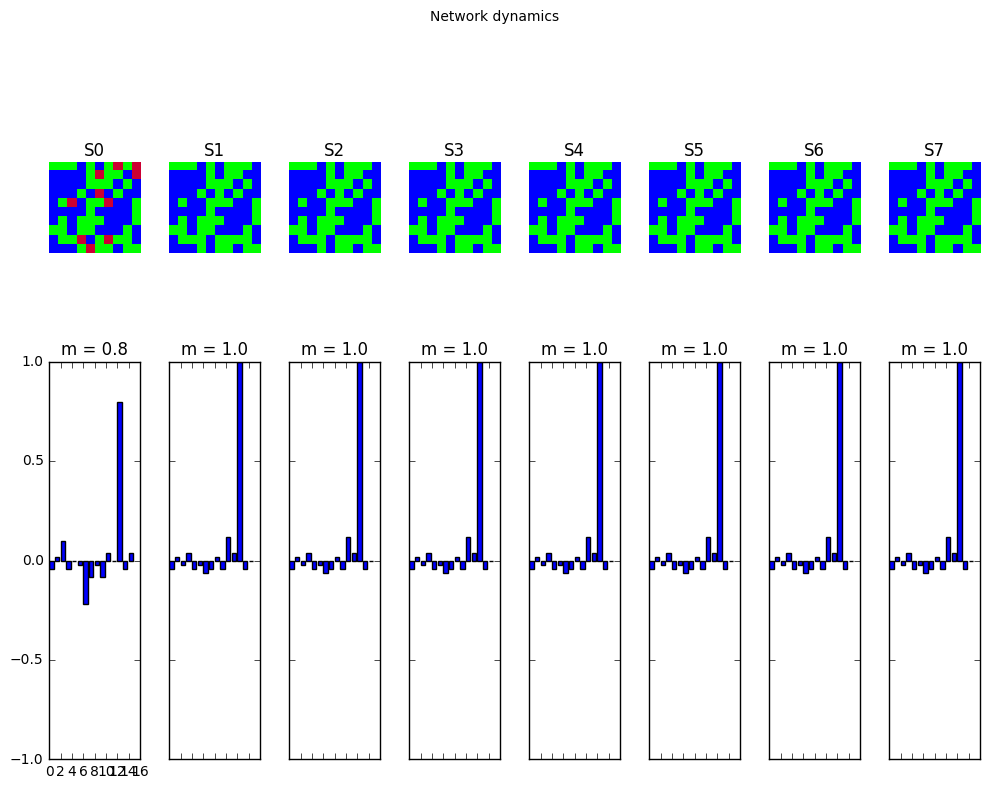

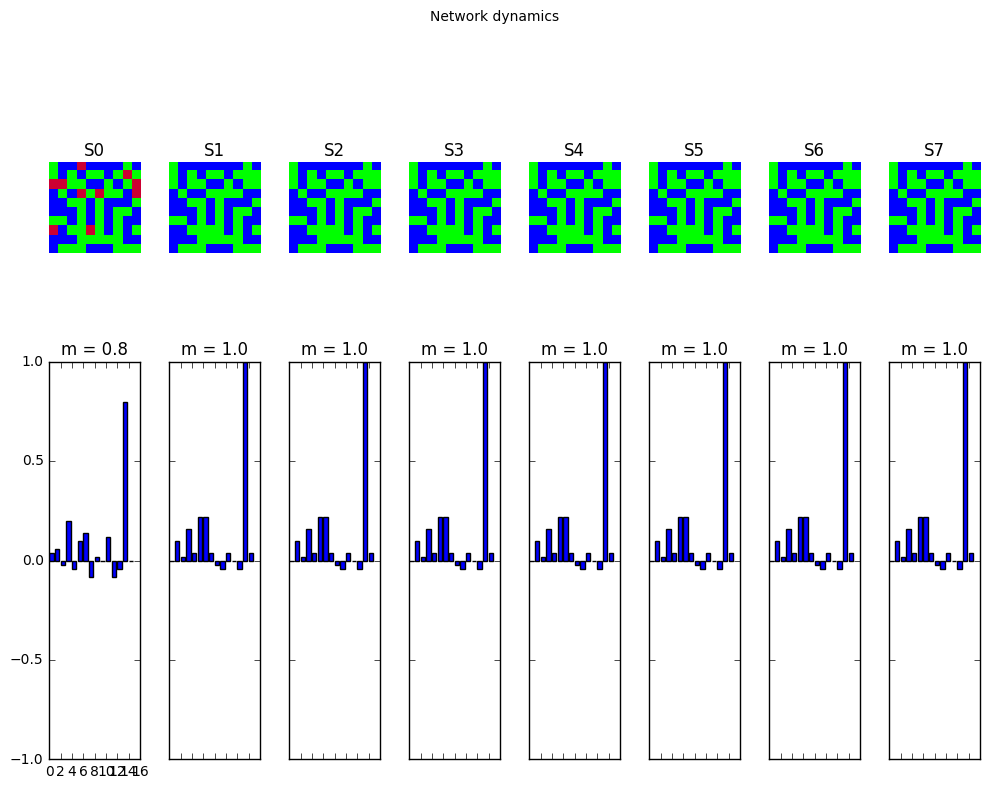

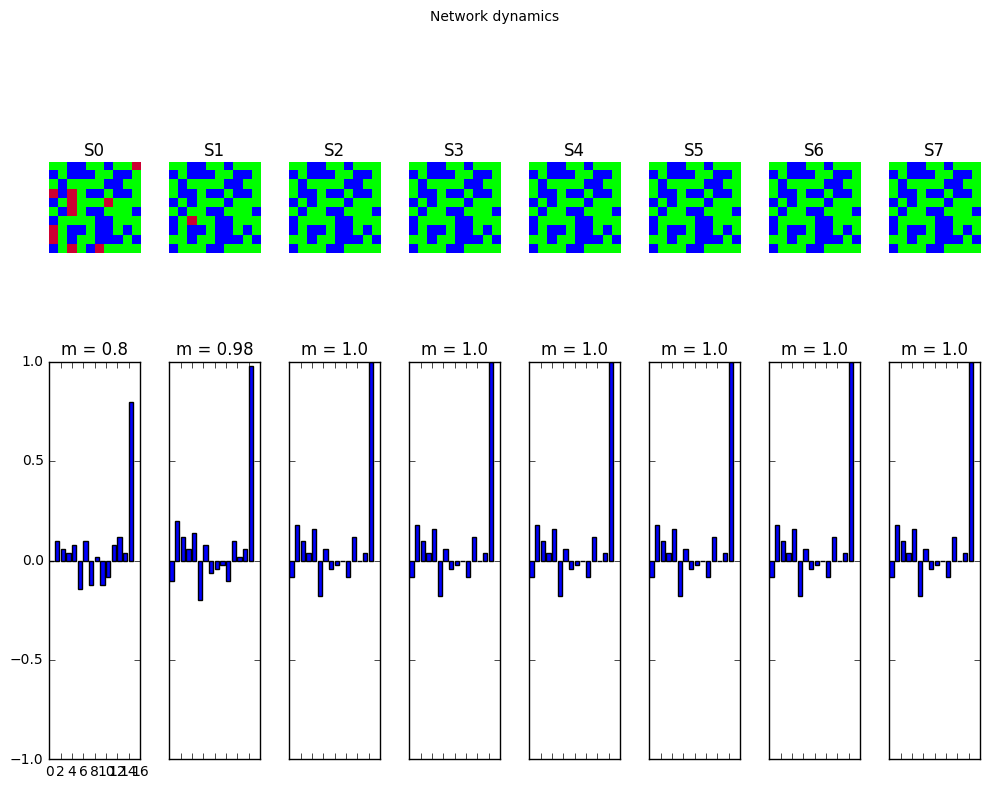

In [20]:
# try to recall from all 5 patterns
for idx, pattern in enumerate(patterns):
    # get a noisy copy of the pattern
    noisy_init = pattern_tools.flip_n(pattern, nr_of_flips=nr_of_flips)
    # set the initial state of the Hopfield network as the noisy copy
    nn.set_state_from_pattern(noisy_init)
    
    # let the dynamics evolve from this initial state
    states = nn.run_with_monitoring(nr_steps=nr_steps)
    
    # each network state is a vector. reshape it to the same shape used to create the patterns.
    states_as_patterns = factory.reshape_patterns(states)
    # plot the states of the network
    plot_tools.plot_state_sequence_and_overlap(states_as_patterns, patterns, reference_idx=idx, suptitle="Network dynamics")